In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
np.random.seed(12)

data = {
    "Student_ID": range(1, 51),
    "Age": np.random.randint(17, 25, 50),
    "Study_Hours": np.random.normal(5, 2, 50),   # average 5 hrs/day
    "Attendance": np.random.randint(60, 90, 50),
    "Internal_Marks": np.random.randint(20, 50, 50),
    "Final_Marks": np.random.randint(30, 100, 50),
    "Gender": np.random.choice(["Male", "Female"], 50)
}

df = pd.DataFrame(data)

In [193]:
# Introduce missing values
import random
random.seed(40)
for i in range(0, 50):
    x = random.randint(0, 101)
    if (x>50):
        col = 1 + x%5
        df.iloc[i, col] = np.nan

In [196]:
# Introduce inconsistency (negative study hours)
df.loc[20, "Study_Hours"] = -3
df.loc[23, "Study_Hours"] = 25
df.loc[16, "Attendance"] = 120
df.loc[16, "Attendance"] = -20

In [197]:
display(df)

,Student_ID,Age,Study_Hours,Attendance,Internal_Marks,Final_Marks,Gender
0,1,20.0,4.319627,77.0,NaN,81.0,Female
1,2,20.0,9.054597,86.0,35.0,NaN,Male
2,3,23.0,3.837840,NaN,39.0,93.0,Female
3,4,22.0,6.746270,64.0,29.0,56.0,Female
4,5,18.0,6.821131,87.0,34.0,34.0,Female
5,6,19.0,7.095291,79.0,31.0,60.0,Male
6,7,NaN,2.620723,78.0,35.0,53.0,Female
7,8,20.0,NaN,84.0,34.0,83.0,Male
8,9,NaN,5.110604,71.0,25.0,62.0,Female
9,10,17.0,5.424422,72.0,21.0,57.0,Male


In [199]:
df.isnull().sum()

Student_ID        0
Age               6
Study_Hours       5
Attendance        7
Internal_Marks    3
Final_Marks       4
Gender            0
dtype: int64

# Handling missing values
* Replace nan values in study_hours with mean
* Replace nan values in attendance with mean
* Replace nan values in age with median
* Drop row if internal or final marks is 0

In [203]:
# replace nan values in study_hours with mean
df["Study_Hours"] = df["Study_Hours"].fillna(df["Study_Hours"].mean())

# replace nan values in attendance with mean
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].mean())

# replace nan values in age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# drop row if internal or final marks is 0
df = df.dropna()

In [204]:
df.isnull().sum()

Student_ID        0
Age               0
Study_Hours       0
Attendance        0
Internal_Marks    0
Final_Marks       0
Gender            0
dtype: int64

# Handling inconsistencies
* Rule 1: Study hours should be between 0 and 12
* Rule 2: Attendance should be between 0 and 100

Inconsistent values are replaced by median

In [208]:
df.loc[df["Study_Hours"] < 0, "Study_Hours"] = df["Study_Hours"].median()
df.loc[df["Study_Hours"] > 12, "Study_Hours"] = df["Study_Hours"].median()
df.loc[df["Attendance"] > 100, "Attendance"] = df["Attendance"].median()
df.loc[df["Attendance"] < 0, "Attendance"] = df["Attendance"].median()

# Handle outliers by IQR method

In [211]:
numeric_cols = ["Age", "Study_Hours", "Attendance", "Internal_Marks", "Final_Marks"]

limits = dict()

for col in numeric_cols:
    Q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df[col], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    limits[col] = (lower_bound, upper_bound)

print(limits)

{'Age': (13.25, 27.25), 'Study_Hours': (1.2731564964995656, 8.012287873008995), 'Attendance': (50.75, 92.75), 'Internal_Marks': (12.75, 54.75), 'Final_Marks': (11.5, 127.5)}


In [213]:
# Introduce outliers in each column
for i in range(len(numeric_cols)):
    # pick number of outliers to introduce
    num_outliers = random.randint(1,5)
    # pick num_outliers number of random indexes
    picks = random.sample(list(range(len(df))), num_outliers)

    col = numeric_cols[i]
    lower_bound = limits[col][0]
    upper_bound = limits[col][1]
    dtype = df[col].dtype
    for j in picks:
        if j%2 == 0:
            # between 1.1 and 1.6 of upper_limit
            if dtype is np.int64:
                new_val = round(upper_bound + random.randint(1,3))
            else:
                new_val = upper_bound * (1 + random.random() * 0.2) 
        else:
            # between 0.5 and 0.9 of lower_limit
            if dtype is np.int64:
                new_val = round(lower_bound - random.randint(1,3))
            else:
                new_val = lower_bound * (0.75 + random.random() * 0.2)
        df.iloc[j, i] = round(new_val)

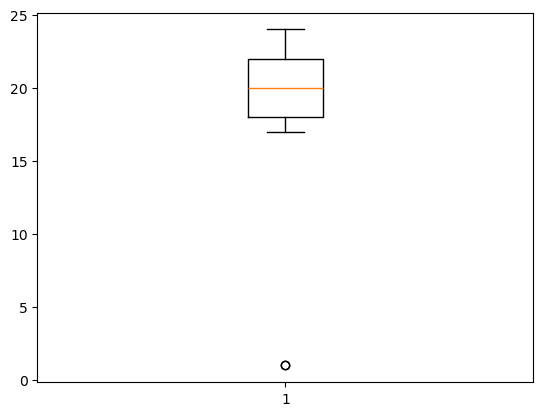

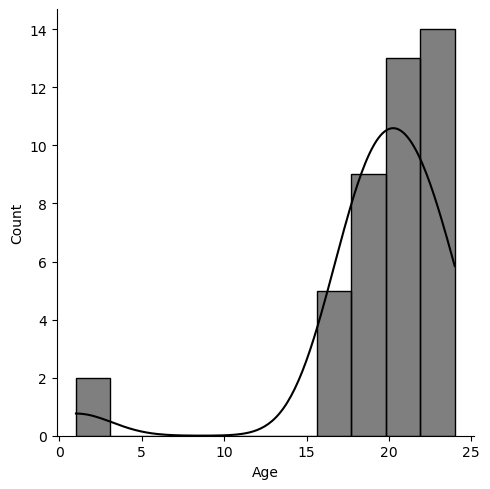

In [215]:
plt.boxplot(df["Age"])
plt.show()
sns.displot(df["Age"], kde= True, color='black')

In [217]:
# handle outliers by replacing too low values with lower_bound
# and replacing too high values with upper_bound

for col in numeric_cols:
    lower_bound = limits[col][0]
    upper_bound = limits[col][1]

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

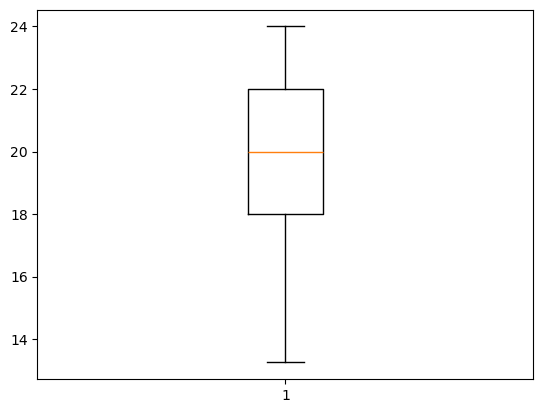

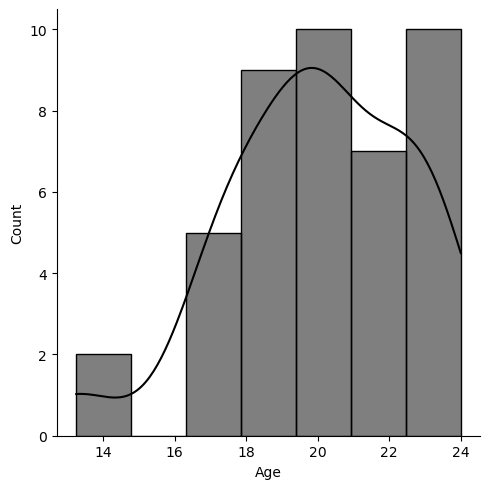

In [219]:
plt.boxplot(df["Age"])
plt.show()
sns.displot(df["Age"], kde= True, color='black')

In [221]:
# log transformation
df['Study_Hours'] = np.log(df['Study_Hours'] + 1)

In [223]:
display(df)

,Student_ID,Age,Study_Hours,Attendance,Internal_Marks,Final_Marks,Gender
2,3,23.00,1.576468,71.44186,39.00,93.0,Female
3,4,22.00,2.047211,64.00000,29.00,56.0,Female
4,5,18.00,2.056829,87.00000,34.00,34.0,Female
5,6,19.00,2.091283,79.00000,31.00,60.0,Male
6,7,20.00,1.286674,78.00000,35.00,53.0,Female
7,8,20.00,1.772626,84.00000,34.00,83.0,Male
8,9,20.00,1.810026,71.00000,25.00,62.0,Female
9,10,17.00,1.860107,72.00000,21.00,57.0,Male
10,11,23.00,1.669470,89.00000,35.00,96.0,Male
11,12,18.00,2.128747,71.44186,42.00,98.0,Male
